In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
df = pd.read_csv('final_data.csv')
print (df.head())

   item_discounted_price   appid                   name release_date  english  \
0                  8.991  326950         Sword of Asumi   2015-01-08      1.0   
1                  8.991  348540   Divine Slice of Life   2015-10-22      1.0   
2                  8.991  352010           Beach Bounce   2015-08-14      1.0   
3                 13.491  398100     Highschool Romance   2015-11-18      1.0   
4                  8.991  408770  Highschool Possession   2015-12-09      1.0   

         developer       publisher          platforms  required_age  \
0        Straywire  Dharker Studio  windows;mac;linux           0.0   
1        NickySwan  Dharker Studio  windows;mac;linux           0.0   
2        Straywire  Dharker Studio  windows;mac;linux           0.0   
3  Chronofire Arts  Dharker Studio  windows;mac;linux           0.0   
4        Straywire  Dharker Studio  windows;mac;linux           0.0   

   achievements  ...  categories_Single-player  categories_Stats  \
0          22.0  .

In [33]:
# Показать примеры данных из колонок, где тип данных 'object'
string_data = df.select_dtypes(include=['object'])
print(string_data.head())

                    name release_date        developer       publisher  \
0         Sword of Asumi   2015-01-08        Straywire  Dharker Studio   
1   Divine Slice of Life   2015-10-22        NickySwan  Dharker Studio   
2           Beach Bounce   2015-08-14        Straywire  Dharker Studio   
3     Highschool Romance   2015-11-18  Chronofire Arts  Dharker Studio   
4  Highschool Possession   2015-12-09        Straywire  Dharker Studio   

           platforms        owners  
0  windows;mac;linux  50000-100000  
1  windows;mac;linux   20000-50000  
2  windows;mac;linux   20000-50000  
3  windows;mac;linux   20000-50000  
4  windows;mac;linux   20000-50000  


In [34]:
# Фильтруем и суммируем значения по жанрам и категориям
top_genres = df.filter(like='genres_').sum().sort_values(ascending=False).head(10)
top_categories = df.filter(like='categories_').sum().sort_values(ascending=False).head(10)

# Получаем список топ-10 колонок из жанров и категорий
top_genre_columns = top_genres.index.tolist()
top_category_columns = top_categories.index.tolist()

# Объединяем списки жанров и категорий
top_columns = top_genre_columns + top_category_columns

# Добавляем все остальные колонки, которые не относятся к жанрам и категориям
other_columns = df.columns.difference(df.filter(like='genres_').columns.union(df.filter(like='categories_').columns)).tolist()

# Оставляем в DataFrame как топ-10 жанров и категорий, так и остальные колонки
df = df[other_columns + top_columns]

# Выводим первые строки обновленного DataFrame
print(df.head())


   achievements   appid  average_playtime        developer  english  \
0          22.0  326950             435.0        Straywire      1.0   
1           1.0  348540             284.0        NickySwan      1.0   
2          10.0  352010             441.0        Straywire      1.0   
3           4.0  398100             429.0  Chronofire Arts      1.0   
4           2.0  408770               0.0        Straywire      1.0   

   item_discounted_price  median_playtime                   name  \
0                  8.991            435.0         Sword of Asumi   
1                  8.991            284.0   Divine Slice of Life   
2                  8.991            441.0           Beach Bounce   
3                 13.491            429.0     Highschool Romance   
4                  8.991              0.0  Highschool Possession   

   negative_ratings        owners  ... categories_Single-player  \
0              90.0  50000-100000  ...                        1   
1              79.0   20000-50

In [35]:
import pandas as pd
import numpy as np

# Пример: ваши данные в DataFrame
# df = pd.read_csv('your_data.csv')

# 1. Преобразование даты релиза в числовой формат (например, год)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')  # Преобразуем в datetime
df['release_year'] = df['release_date'].dt.year  # Извлекаем год

# 2. Преобразование платформ в бинарные индикаторы
# Если платформа поддерживается, ставим 1, иначе 0
df['platform_windows'] = df['platforms'].apply(lambda x: 1 if 'windows' in x.lower() else 0)
df['platform_mac'] = df['platforms'].apply(lambda x: 1 if 'mac' in x.lower() else 0)
df['platform_linux'] = df['platforms'].apply(lambda x: 1 if 'linux' in x.lower() else 0)

# 3. Преобразование диапазонов пользователей в среднее значение
def parse_owners(owners_range):
    if pd.isna(owners_range):  # Проверяем на NaN
        return np.nan
    # Разбиваем диапазон и считаем среднее
    range_values = owners_range.split('-')
    if len(range_values) == 2:
        low = int(range_values[0].replace(',', ''))
        high = int(range_values[1].replace(',', ''))
        return (low + high) / 2
    else:
        return np.nan  # Если формат не подходит

# Применяем функцию для преобразования колонок 'owners'
df['estimated_owners'] = df['owners'].apply(parse_owners)

# Удаляем старые колонки, которые были преобразованы
df.drop(columns=['platforms', 'release_date', 'owners'], inplace=True)

# Выводим первые строки преобразованного DataFrame
print(df.head())


   achievements   appid  average_playtime        developer  english  \
0          22.0  326950             435.0        Straywire      1.0   
1           1.0  348540             284.0        NickySwan      1.0   
2          10.0  352010             441.0        Straywire      1.0   
3           4.0  398100             429.0  Chronofire Arts      1.0   
4           2.0  408770               0.0        Straywire      1.0   

   item_discounted_price  median_playtime                   name  \
0                  8.991            435.0         Sword of Asumi   
1                  8.991            284.0   Divine Slice of Life   
2                  8.991            441.0           Beach Bounce   
3                 13.491            429.0     Highschool Romance   
4                  8.991              0.0  Highschool Possession   

   negative_ratings  positive_ratings  ...  categories_Multi-player  \
0              90.0             258.0  ...                        0   
1              79.0   

In [36]:
df.columns

Index(['achievements', 'appid', 'average_playtime', 'developer', 'english',
       'item_discounted_price', 'median_playtime', 'name', 'negative_ratings',
       'positive_ratings', 'price', 'publisher', 'required_age',
       'genres_Indie', 'genres_Action', 'genres_Adventure', 'genres_Casual',
       'genres_Strategy', 'genres_RPG', 'genres_Simulation', 'genres_Racing',
       'genres_Sports', 'genres_Early Access', 'categories_Single-player',
       'categories_Steam Trading Cards', 'categories_Steam Achievements',
       'categories_Steam Cloud', 'categories_Full controller support',
       'categories_Multi-player', 'categories_Steam Leaderboards',
       'categories_Partial Controller Support', 'categories_Co-op',
       'categories_Stats', 'release_year', 'platform_windows', 'platform_mac',
       'platform_linux', 'estimated_owners'],
      dtype='object')

In [37]:
y = df['item_discounted_price']

# Удаляем ненужные колонки
X = df.drop(columns=['appid', 'name', 'item_discounted_price'])

# Определяем категориальные колонки
categorical_features = ['developer', 'publisher']

# Разделяем данные на тренировочные и тестовые (80% на 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели CatBoost с использованием GPU
model = CatBoostRegressor(
    iterations=1000, 
    learning_rate=0.05, 
    depth=6, 
    cat_features=categorical_features, 
    task_type='GPU',  # Используем GPU
    devices='0:1',  # Можно указать несколько устройств, если нужно
    verbose=100
)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)  # MAE
r2 = r2_score(y_test, y_pred)  # R²

# Вывод метрик
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")


0:	learn: 7.4397286	total: 75ms	remaining: 1m 14s
100:	learn: 1.4922688	total: 3.5s	remaining: 31.1s
200:	learn: 1.2827590	total: 6.57s	remaining: 26.1s
300:	learn: 1.2498833	total: 9.91s	remaining: 23s
400:	learn: 1.2204145	total: 13.4s	remaining: 19.9s
500:	learn: 1.1820134	total: 16.8s	remaining: 16.7s
600:	learn: 1.0877038	total: 20.4s	remaining: 13.5s
700:	learn: 0.9986286	total: 23.8s	remaining: 10.2s
800:	learn: 0.9805750	total: 27.1s	remaining: 6.73s
900:	learn: 0.9681792	total: 30.4s	remaining: 3.34s
999:	learn: 0.9640551	total: 33.6s	remaining: 0us
RMSE: 1.4409520359020922
MAE: 0.8431163820354335
R²: 0.9463648020607824


c:\Users\ereme\AI_KC\final_PROJECT\mfdp_venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


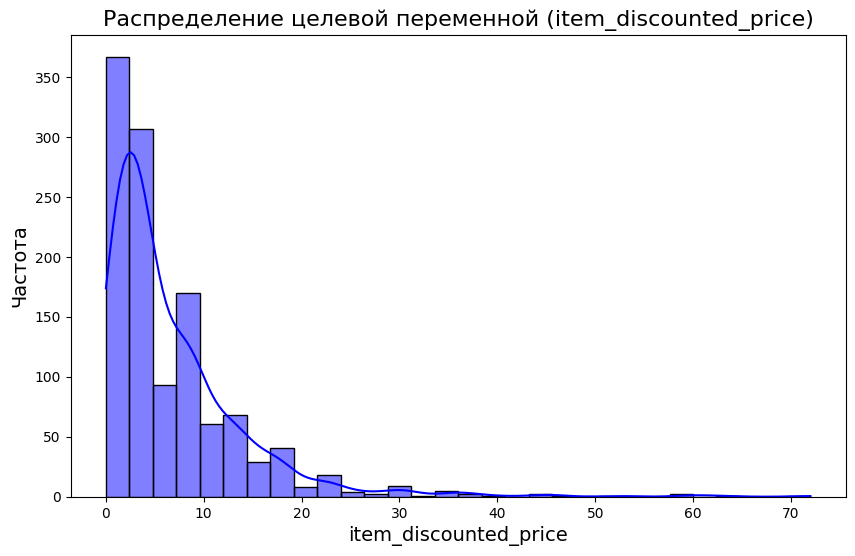

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, что y — это ваш целевой признак, например, 'item_discounted_price'
y = df['item_discounted_price']

# Плотность распределения
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30, color='blue')
plt.title('Распределение целевой переменной (item_discounted_price)', fontsize=16)
plt.xlabel('item_discounted_price', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()


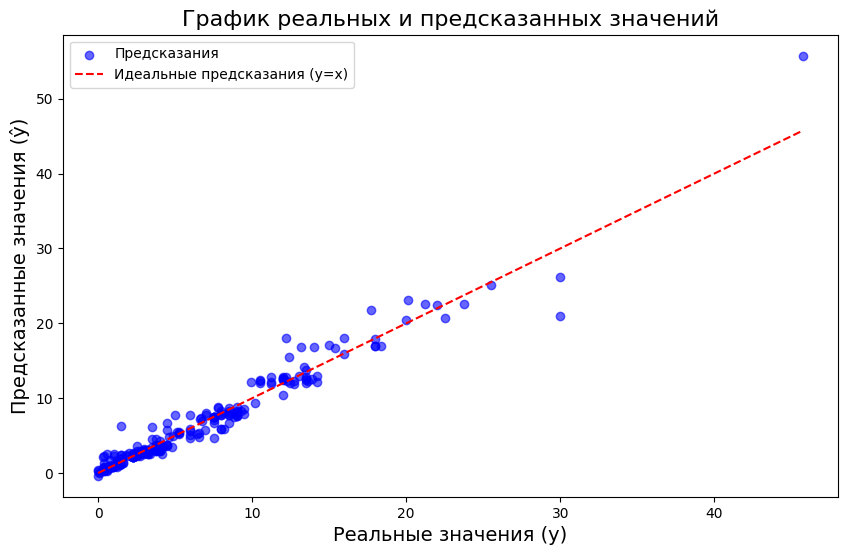

In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Предсказания')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Идеальные предсказания (y=x)')
plt.title('График реальных и предсказанных значений', fontsize=16)
plt.xlabel('Реальные значения (y)', fontsize=14)
plt.ylabel('Предсказанные значения (ŷ)', fontsize=14)
plt.legend()
plt.show()


In [48]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# Расчет SMAPE
smape_value = smape(y_test, y_pred)

# Вывод метрик
print(f"SMAPE: {smape_value:.2f}%")

SMAPE: 21.44%


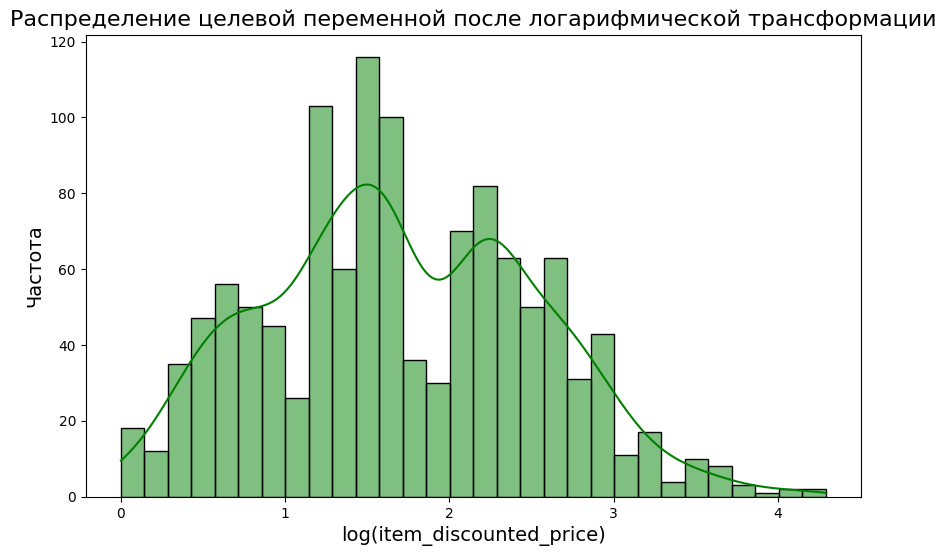

In [49]:
import numpy as np

# Применяем логарифмическую трансформацию (добавляем 1, чтобы избежать log(0))
df['log_item_discounted_price'] = np.log1p(df['item_discounted_price'])

# Визуализируем распределение после трансформации
plt.figure(figsize=(10, 6))
sns.histplot(df['log_item_discounted_price'], kde=True, bins=30, color='green')
plt.title('Распределение целевой переменной после логарифмической трансформации', fontsize=16)
plt.xlabel('log(item_discounted_price)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()


In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Логарифмическая трансформация целевой переменной
df['log_item_discounted_price'] = np.log1p(df['item_discounted_price'])  # log(1 + x), чтобы избежать log(0)

# Удаляем ненужные колонки
X = df.drop(columns=['appid', 'name', 'item_discounted_price', 'log_item_discounted_price'])

# Целевая переменная — логарифмированная цена
y = df['log_item_discounted_price']

# Определяем категориальные колонки
categorical_features = ['developer', 'publisher']

# Разделяем данные на тренировочные и тестовые (80% на 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели CatBoost с использованием GPU (если у вас есть GPU)
model = CatBoostRegressor(
    iterations=1000, 
    learning_rate=0.05, 
    depth=6, 
    cat_features=categorical_features, 
    task_type='GPU',  # Используем GPU
    devices='0',  # Если несколько устройств, используйте '0:1'
    verbose=100
)

# Обучение модели на логарифмической целевой переменной
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_log = model.predict(X_test)

# Обратная трансформация для предсказанных значений
y_pred = np.expm1(y_pred_log)  # exp(y) - 1

# Обратная трансформация для реальных значений
y_test_real = np.expm1(y_test)

# Оценка модели
rmse = mean_squared_error(y_test_real, y_pred, squared=False)  # RMSE на исходных данных
mae = mean_absolute_error(y_test_real, y_pred)  # MAE
r2 = r2_score(y_test_real, y_pred)  # R²
smape_value = smape(y_test_real, y_pred)

# Вывод метрик
print(f"SMAPE: {smape_value:.2f}%")

# Вывод метрик
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")
print(f"SMAPE: {smape_value:.2f}%")


0:	learn: 0.7921107	total: 48.3ms	remaining: 48.2s
100:	learn: 0.1724754	total: 5.11s	remaining: 45.5s
200:	learn: 0.1525501	total: 9.72s	remaining: 38.6s
300:	learn: 0.1388947	total: 14s	remaining: 32.5s
400:	learn: 0.1266642	total: 18.5s	remaining: 27.6s
500:	learn: 0.1183693	total: 23.5s	remaining: 23.4s
600:	learn: 0.1079410	total: 29.6s	remaining: 19.7s
700:	learn: 0.1038557	total: 35.9s	remaining: 15.3s
800:	learn: 0.1000060	total: 41.9s	remaining: 10.4s
900:	learn: 0.0982679	total: 47.4s	remaining: 5.2s
999:	learn: 0.0968156	total: 52.2s	remaining: 0us
SMAPE: 16.97%
RMSE: 1.1551226742723462
MAE: 0.697570329831317
R²: 0.9655327165668581
SMAPE: 16.97%


c:\Users\ereme\AI_KC\final_PROJECT\mfdp_venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


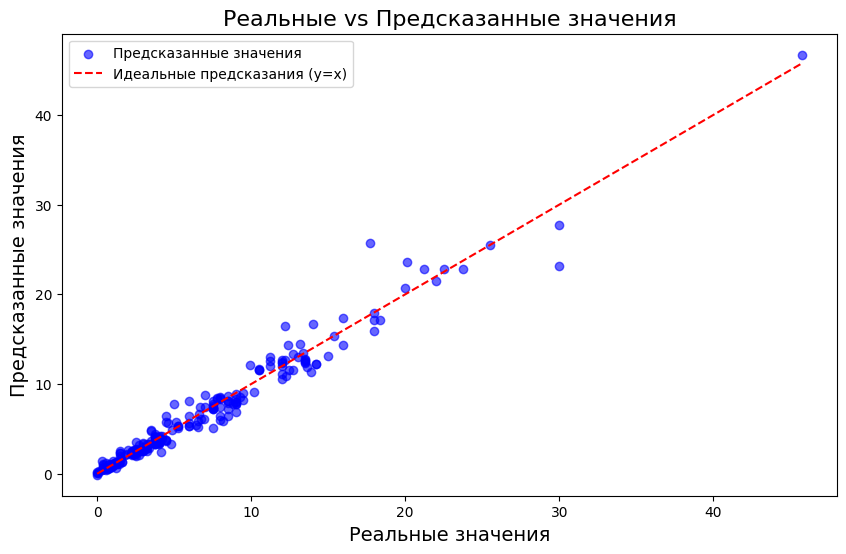

In [53]:
import matplotlib.pyplot as plt

# Построение графика
plt.figure(figsize=(10, 6))

# Точечный график реальных и предсказанных значений
plt.scatter(y_test_real, y_pred, alpha=0.6, color='blue', label='Предсказанные значения')
plt.plot([min(y_test_real), max(y_test_real)], [min(y_test_real), max(y_test_real)], color='red', linestyle='--', label='Идеальные предсказания (y=x)')

# Подписи и легенда
plt.title('Реальные vs Предсказанные значения', fontsize=16)
plt.xlabel('Реальные значения', fontsize=14)
plt.ylabel('Предсказанные значения', fontsize=14)
plt.legend()
plt.show()


In [54]:
#save model
model.save_model('prices_model.cbm')